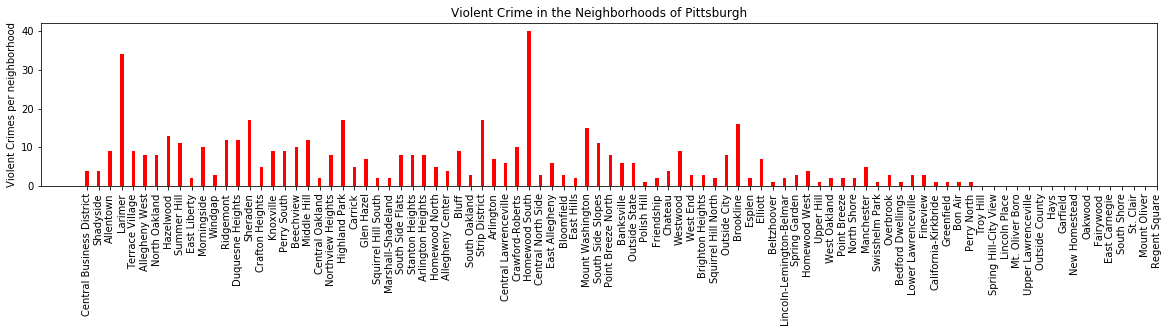

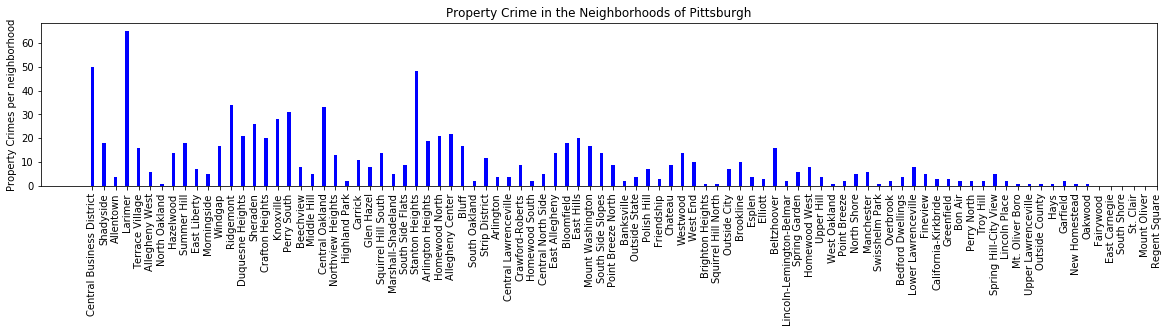

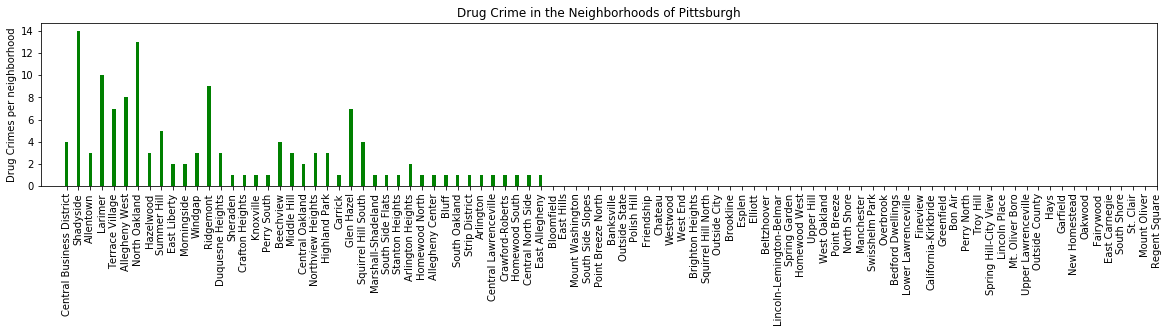

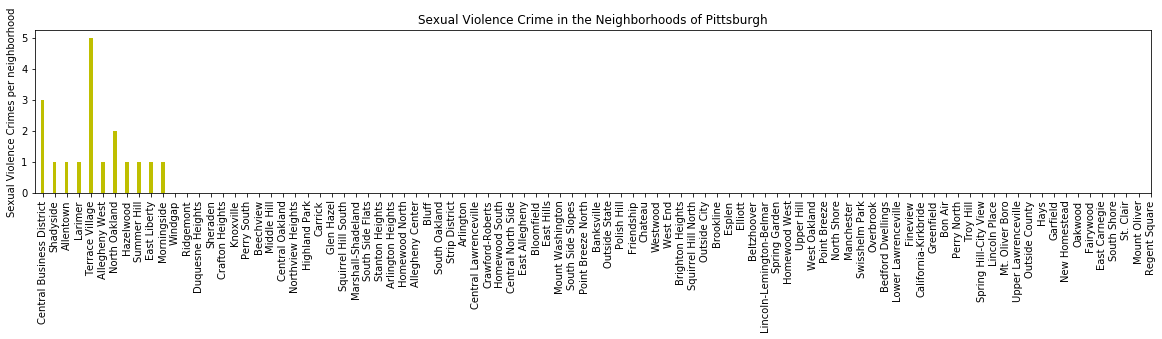

Final Points after all categories
East Carnegie: 34
Regent Square: 34
Mount Oliver: 45
Oakwood: 55
Swisshelm Park: 57
Arlington Heights: 59
Hays: 63
St. Clair: 65
Ridgemont: 68
Summer Hill: 85
Windgap: 87
Bon Air: 93
Fairywood: 95
New Homestead: 105
Esplen: 106
Glen Hazel: 118
Spring Garden: 123
Westwood: 124
Duquesne Heights: 128
Polish Hill: 129
West End: 129
Morningside: 138
Friendship: 140
Bedford Dwellings: 177
Upper Hill: 181
California-Kirkbride: 188
Allegheny West: 192
Upper Lawrenceville: 198
Point Breeze North: 206
Overbrook: 210
Arlington: 212
Fineview: 215
Stanton Heights: 220
Lincoln Place: 227
Lower Lawrenceville: 228
West Oakland: 244
Homewood West: 246
Elliott: 265
Banksville: 266
Manchester: 271
Troy Hill: 285
Strip District: 287
Northview Heights: 300
Point Breeze: 314
Allegheny Center: 315
Highland Park: 317
Central Lawrenceville: 319
Crafton Heights: 339
Terrace Village: 362
South Oakland: 372
South Side Slopes: 378
Central Oakland: 387
Garfield: 402
North Shore: 41

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

crime = pd.read_csv("PittsburghCrimeReports.csv")
crime.dropna(how='any', subset=['INCIDENTNEIGHBORHOOD'], inplace=True)
neighborhoodViolenceIndex = {}  #Index of violent crimes
neighborhoodPropertyIndex = {} #Index of property crimes
neighborhoodDrugIndex = {} #Index of drug crimes
neighborhoodSexualViolenceIndex = {}#Index of sexaul crimes
cpp =  {}#index of crimeby neighborhood

#These keywords will be used to categorize the type of crime, by the most common naming conventions
violenceKeywords = {"AGG-ASSAULT", "SIMPLE ASSAULT" "DOA", "HIT AND RUN", "ROBBERY", "THREAT"}
propertyKeywords = {"THEFT", "BURGLARY", "TRESPASS", "STOLEN PROPERTY", "CREDIT CARDS"}
drugKeywords = {"DUI", "DRUG", "DRUNKENESS"}
sexualViolenceKeywords = {"INDECENT EXPOSURE", "INDECENT ASSAULT", "LEWDNESS", "SEXUAL ASSAULT", "SEXUAL ABUSE" "LURING CHILD", "CONTACT OR COMMUNICATION W MINOR", "MEGANS LAW VIOLATION"}

#This bulk of the code searches the report for keywords and builds a dictionary representation
for report in crime.index:
    offense = crime.loc[report, "INCIDENTHIERARCHYDESC"]
    
    #Tally offe
    if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in cpp:
        cpp[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
    else:
        cpp[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
    
    #Tally violent offenses by neighborhood
    for v in violenceKeywords:
        if v in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodViolenceIndex:
                neighborhoodViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
            
    #Tally drug offenses by neighborhood
    for d in drugKeywords:
        if d in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodDrugIndex:
                neighborhoodDrugIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodDrugIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
            
    #Tally sexual violence offenses by neighborhood
    for s in sexualViolenceKeywords:
        if s in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodSexualViolenceIndex:
                neighborhoodSexualViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodSexualViolenceIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
                
    #Tally property crime offenses by neighborhood
    for p in propertyKeywords:
        if p in offense:
            if crime.loc[report, "INCIDENTNEIGHBORHOOD"] in neighborhoodPropertyIndex:
                neighborhoodPropertyIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] += 1
            else:
                neighborhoodPropertyIndex[crime.loc[report, "INCIDENTNEIGHBORHOOD"]] = 1
                
import collections
cpp = collections.OrderedDict(sorted(cpp.items()))

#Removes outlying neighborhoods
del cpp["Mt. Oliver Boro"]
del cpp["Outside City"]
del cpp["Outside County"]
del cpp["Outside State"]

population = pd.read_csv("population-density.csv")

pop = {}
for town in population.index:
    z = population.loc[town, "Pop. 2010"]
    z = z.replace(',', '')
    pop[population.loc[town, "Neighborhood"]] = z
    
del pop["Chartiers City"]
pop["Mount Oliver"] = pop["Mt. Oliver"]
del pop["Mt. Oliver"]
pop["Central North Side"] = pop["Central Northside"]
del pop["Central Northside"]

pop = collections.OrderedDict(sorted(pop.items()))
    
percent = {}
for x in cpp:
    y = int(cpp[x]) / int(pop[x])
    y = round(y, 3)
    percent[x] = (y)
    
del percent["Chateau"]

percent = collections.OrderedDict(sorted(percent.items()))
    
points = {}
for x in percent:
    points[x] = int(percent[x]*1000)
    
sortedPoints = sorted(points.items(), key=lambda kv: kv[1])
sortedPoints = collections.OrderedDict(sortedPoints)
    
# print("Point after Crimes per Person")
# for x in sortedPoints:
#     print(x + ": " + str(sortedPoints[x]))
    
# print("     ")


# POINTS FOR CRIME TYPES

                
#plot violent crime stats
plt.figure(figsize=(20, 3))
plt.bar(range(len(neighborhoodViolenceIndex)), neighborhoodViolenceIndex.values(), align='center', width=0.3, color='r')
plt.xticks(range(len(cpp)), cpp.keys(), rotation='vertical')
plt.title("Violent Crime in the Neighborhoods of Pittsburgh")
plt.ylabel("Violent Crimes per neighborhood")
plt.show()

#plot property crime stats
plt.figure(figsize=(20, 3))
plt.bar(range(len(neighborhoodPropertyIndex)), neighborhoodPropertyIndex.values(), align='center', width=0.3, color='b')
plt.xticks(range(len(cpp)), cpp.keys(), rotation='vertical')
plt.title("Property Crime in the Neighborhoods of Pittsburgh")
plt.ylabel("Property Crimes per neighborhood")
plt.show()

#plot drug crime stats
plt.figure(figsize=(20, 3))
plt.bar(range(len(neighborhoodDrugIndex)), neighborhoodDrugIndex.values(), align='center', width=0.3, color='g')
plt.xticks(range(len(cpp)), cpp.keys(), rotation='vertical')
plt.title("Drug Crime in the Neighborhoods of Pittsburgh")
plt.ylabel("Drug Crimes per neighborhood")
plt.show()

#plot sexual violent crime stat
plt.figure(figsize=(20, 3))
plt.bar(range(len(neighborhoodSexualViolenceIndex)), neighborhoodSexualViolenceIndex.values(), align='center', width=0.3, color='y')
plt.xticks(range(len(cpp)), cpp.keys(), rotation='vertical')
plt.title("Sexual Violence Crime in the Neighborhoods of Pittsburgh")
plt.ylabel("Sexual Violence Crimes per neighborhood")
plt.show()
                
propPoints = {}
for x in neighborhoodPropertyIndex:
    propPoints[x] = int(neighborhoodPropertyIndex[x] * 2)
    
del propPoints["Chateau"]
del propPoints["Mt. Oliver Boro"]
del propPoints["Outside City"]
del propPoints["Outside County"]
    
for x in propPoints:
    points[x] = points[x] + propPoints[x]
    
drugPoints = {}
for x in neighborhoodDrugIndex:
    propPoints[x] = int(neighborhoodDrugIndex[x] * 2)
    
for x in drugPoints:
    points[x] = points[x] + drugPoints[x]
    
vioPoints = {}
for x in neighborhoodViolenceIndex:
    propPoints[x] = int(neighborhoodViolenceIndex[x] * 4)
    
for x in vioPoints:
    points[x] = points[x] + vioPoints[x]
    
sexPoints = {}
for x in neighborhoodSexualViolenceIndex:
    propPoints[x] = int(neighborhoodSexualViolenceIndex[x] * 8)
    
for x in sexPoints:
    points[x] = points[x] + sexPoints[x]

sortedPoints = sorted(points.items(), key=lambda kv: kv[1])
sortedPoints = collections.OrderedDict(sortedPoints)
    
# print("Point after Types of Crimes")
# for x in sortedPoints:
#     print(x + ": " + str(sortedPoints[x]))
    
# print("     ")    

        
# POINTS FOR FIRE INCIDENTS


fire = pd.read_csv("FireIncidents.csv")
fire.dropna(how='any', subset=['neighborhood'], inplace=True)

fireDict = {}
for report in fire.index:
    if fire.loc[report, "neighborhood"] in fireDict:
        fireDict[fire.loc[report, "neighborhood"]] += 1
    else: 
        fireDict[fire.loc[report, "neighborhood"]] = 1
        
import collections
fireDict = collections.OrderedDict(sorted(fireDict.items()))

del fireDict["Chateau"] 
del fireDict["Chartiers City"]
del fireDict["Mount Oliver Borough"]
fireDict["Mount Oliver"] = fireDict["Mt. Oliver"]
del fireDict["Mt. Oliver"]
fireDict["Central North Side"] = fireDict["Central Northside"]
del fireDict["Central Northside"]

fireDict = collections.OrderedDict(sorted(fireDict.items()))

firePoints = {}
for x in fireDict:
    firePoints[x] = int(fireDict[x]) * 5
    
for x in firePoints:
    points[x] = points[x] + firePoints[x]
    
sortedPoints = sorted(points.items(), key=lambda kv: kv[1])
sortedPoints = collections.OrderedDict(sortedPoints)
    
print("Final Points after all categories")
for x in sortedPoints:
    print(x + ": " + str(sortedPoints[x]))